<a name='T'>

<p style="padding: 20px;
          background-color: black;
          font-family: computermodern;
          color: white;
          font-size: 200%;
          text-align: center;
          border-radius: 40px 20px;
          ">No-AI Coding Challenge #1 ⚪ Beautiful String<br>
          </p>
<p style="font-family: computermodern;
          color: #000000;
          font-size: 175%;
          text-align: center;
          ">Programming Puzzle, "Newbie" Difficulty (1000 Elo)
             </p>

Welcome to my **No-AI Coding series**! This is intended to any programmer willing to keep their brain sharp in a world where AI usually codes everything for you.

Today, I propose an easy problem to warm up: the [Beautiful String](https://codeforces.com/problemset/problem/2162/B) puzzle from CodeForces. Let's dive into it!

<a id="TOC"></a>

<div style="background-color: #f5f5f5; border-left: 10px solid #9e9e9e; padding: 20px; margin-bottom: 20px; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    <h3 style="color: #616161;">Table of Contents</h3>
    <ul style="list-style-type: none;">
        <li><a href="#s1" style="color: #424242;"><strong>1. Instructions</strong></a></li>
        <li><a href="#s2" style="color: #424242;"><strong>2. Input and Output</strong></a></li>
        <li><a href="#s3" style="color: #424242;"><strong>3. Show Time!</strong></a></li>
        <li><a href="#s4" style="color: #424242;"><strong>4. Evaluation</strong></a></li>
        <li><a href="#s5" style="color: #424242;"><strong>5. Proposed Solution</strong></a></li>
    </ul>
</div>

*Notebook by Ir. Alexandre Le Mercier.*

In [2]:
import sys, os

if not os.path.exists('.git') and not os.path.exists('no-ai-coding-challenges'):
    !git clone https://github.com/TortueSagace/no-ai-coding-challenges.git -q

repo_path = 'no-ai-coding-challenges'
if os.path.exists(repo_path) and repo_path not in sys.path:
    sys.path.insert(0, repo_path)

from utils import *
from cha1_utils import *

<a id="s1"></a>
<div style="color: black; background-color: #E6E6FA; padding: 10px; border-left: 5px solid purple; border-radius: 5px;">  
    <h1>1. Instructions</h1>
</div>

[Back to table of contents](#TOC)

***This problem is meant to be entirely solved without AI! Time to do some brain work-out*** 💪

You are given a binary string `s` of length `n`.

Your goal is to find **any** subsequence `p` of `s` such that:

1. **`p` is non-decreasing**  
   Interpreting `'0' < '1'`, this means `p` must look like some number of `'0'`s followed by some number of `'1'`s (possibly empty on either side).  
   Examples of non-decreasing binary strings: `""`, `"0"`, `"000"`, `"01"`, `"00111"`, `"111"`.

2. **`x` must be a palindrome**, where `x` is the remaining string after removing from `s` all characters chosen for `p` (removing by indices, while keeping the relative order of the remaining characters).

You only need to output **one valid** subsequence `p`. If it is impossible, output `-1`.

> Note: The empty string is considered both non-decreasing and a palindrome.

Quick Definitions:

- **Binary string**: a string consisting only of `'0'` and `'1'`.
- **Subsequence**: select indices `1 ≤ i1 < i2 < ... < ik ≤ n` and take `s[i1] s[i2] ... s[ik]` (not necessarily contiguous).
- **Palindrome**: a string `t` is a palindrome if `t[i] == t[len(t)-1-i]` for all valid `i`.

<a id="s2"></a>
<div style="color: black; background-color: #E6E6FA; padding: 10px; border-left: 5px solid purple; border-radius: 5px;">  
    <h1>2. Input and Output</h1>
</div>

[Back to table of contents](#TOC)

## Input

Your function receives:
- `n` (int): the length of the string (`1 ≤ n ≤ 10`)
- `s` (list of int): the binary string as a list of `0`s and `1`s

**Example:**

```python
n = 8
s = [1, 1, 0, 1, 0, 0, 1, 1]
```

## Output

Your function must return a tuple `(k, indices)` where:
- `k` (int): the length of the chosen subsequence `p` (`0 ≤ k ≤ n`)
- `indices` (list of int): `k` **distinct** 1-indexed positions `i1, i2, ..., ik` (`1 ≤ i1 < i2 < ... < ik ≤ n`) forming `p`

**Example:**

```python
k = 2
indices = [3, 4]  # 1-indexed positions
```

## Sample Test Cases

| n | s | Valid Output (k, indices) | Explanation |
|---|---|---------------------------|-------------|
| 3 | `[0, 1, 0]` | `(0, [])` | s is already a palindrome |
| 3 | `[0, 0, 1]` | `(2, [2, 3])` | Remove positions 2,3 → remaining `[0]` is palindrome |
| 5 | `[0, 0, 1, 1, 1]` | `(5, [1, 2, 3, 4, 5])` | Remove all → empty string is palindrome |
| 8 | `[1, 1, 0, 1, 0, 0, 1, 1]` | `(2, [3, 4])` | Remove `01` at positions 3,4 → `[1,1,0,0,1,1]` is palindrome |
| 6 | `[1, 0, 0, 1, 0, 1]` | `(2, [5, 6])` | Remove positions 5,6 → `[1,0,0,1]` is palindrome |

<a id="s3"></a>
<div style="color: black; background-color: #E6E6FA; padding: 10px; border-left: 5px solid purple; border-radius: 5px;">  
    <h1>3. Show Time!</h1>
</div>

[Back to table of contents](#TOC)

***Time to shine! Try solving the problem by yourself. You can do it!*** 🧠

Implement your solution in the `my_solution(n, s)` function below. The function should return `(k, indices)` as described above.

**Time limit per test**: 1 second.

**Memory limit per test**: 256 megabytes.

In [3]:
######################### SETUP ############################

samples = [
    [3, [0, 1, 0]],
    [3, [0, 0, 1]],
    [5, [0, 0, 1, 1, 1]],
    [8, [1, 1, 0, 1, 0, 0, 1, 1]],
    [6, [1, 0, 0, 1, 0, 1]]
]

TIME_LIMIT = 1
MEMORY_LIMIT = 256e6

print(f"Loaded {len(samples)} sample test cases.")

Loaded 5 sample test cases.


In [4]:
######################### RESOLUTION ###########################

def my_solution(n, s):
    """
    Find a subsequence p such that:
    - p is non-decreasing (all 0s followed by all 1s)
    - the remaining string after removing p is a palindrome
    
    Parameters:
    -----------
    n : int
        Length of the string
    s : list of int
        Binary string as a list of 0s and 1s
    
    Returns:
    --------
    tuple : (k, indices) where k is the length and indices is a list of 1-indexed positions
    """
    
    # --> Your solution here! <--
    
    pass  # Remove this and return (k, indices)

ℹ️ **Tips**
- Run the cell below to test your solution on the sample test cases.
- Note that multiple valid solutions may exist for each test case.

<div style="color: black; background-color: #ffcccc; padding: 10px; border-left: 5px solid #ff3333; border-radius: 5px;">
    <strong>Important note:</strong> The evaluation checks if your solution is <em>valid</em>, not if it matches a specific expected output.
</div>

In [5]:
##################### ACCURACY AND EFFICIENCY CHECK ########################

try:
    evaluate_on_samples(samples, my_solution, check_solution, TIME_LIMIT, MEMORY_LIMIT)
except Exception as e:
    print(e)

❌  Invalid output: function returned None. Did you run the cell containing your solution?


<a id="s4"></a>
<div style="color: black; background-color: #E6E6FA; padding: 10px; border-left: 5px solid purple; border-radius: 5px;">  
    <h1>4. Evaluation</h1>
</div>

[Back to table of contents](#TOC)

Run the cell below to evaluate your solution on 50 hidden test cases.

In [6]:
##################### INTERNAL EVALUATION ########################

test_file_path = 'no-ai-coding-challenges/cha1_tests.txt'

try:
    internal_evaluation(test_file_path, my_solution, check_solution, parse_tests, TIME_LIMIT, MEMORY_LIMIT, get_input_size=get_input_size, plot_title='Beautiful String', show_estimation=False)
except Exception as e:
    print(e)

  0%|          | 0/300 [00:00<?, ?it/s]


❌  Invalid output: function returned None. Did you run the cell containing your solution?


<a id="s5"></a>
<div style="color: black; background-color: #E6E6FA; padding: 10px; border-left: 5px solid purple; border-radius: 5px;">  
    <h1>5. Proposed Solution</h1>
</div>

[Back to table of contents](#TOC)

Here is a correct solution. It doesn't necessarily mean that it is the *only* correct one.

<div style="color: black; background-color: #cce5ff; padding: 10px; border-left: 5px solid #3399ff; border-radius: 5px;">
    <strong>💡 Solution Explanation:</strong><br><br>
    The key insight is that any string of identical characters (all 0s or all 1s) is always a palindrome.<br><br>
    <strong>Strategy:</strong>
    <ol>
        <li>If <code>s</code> is already a palindrome, we don't need to remove anything → return <code>(0, [])</code></li>
        <li>Otherwise, remove <strong>all the 0s</strong> from the string:
            <ul>
                <li>The removed subsequence (all 0s) is trivially non-decreasing ✓</li>
                <li>The remaining string (all 1s) is trivially a palindrome ✓</li>
            </ul>
        </li>
    </ol>
    This greedy approach always works because a string of identical characters satisfies both constraints by definition. There is therefore always a valid solution to the problem, and we never need to return -1.
</div><br>

Both time and space complexities here are $\mathcal O(n)$.

In [7]:
######################### PROPOSED SOLUTION ###########################

def proposed_solution(n, s):
    """
    A simple and elegant solution:
    - If s is already a palindrome, return empty subsequence
    - Otherwise, remove all 0s (which forms a non-decreasing subsequence)
      The remaining 1s always form a palindrome (string of all 1s)
    """
    
    def is_palindrome(lst):
        return lst == lst[::-1]
    
    # Check if s is already a palindrome
    if is_palindrome(s):
        return (0, [])
    
    # Find all 0's positions (1-indexed)
    indices = [i + 1 for i, val in enumerate(s) if val == 0]
    
    return (len(indices), indices)


Testing proposed solution on hidden tests:


  0%|          | 0/300 [00:00<?, ?it/s]

✅  All 300 tests passed!


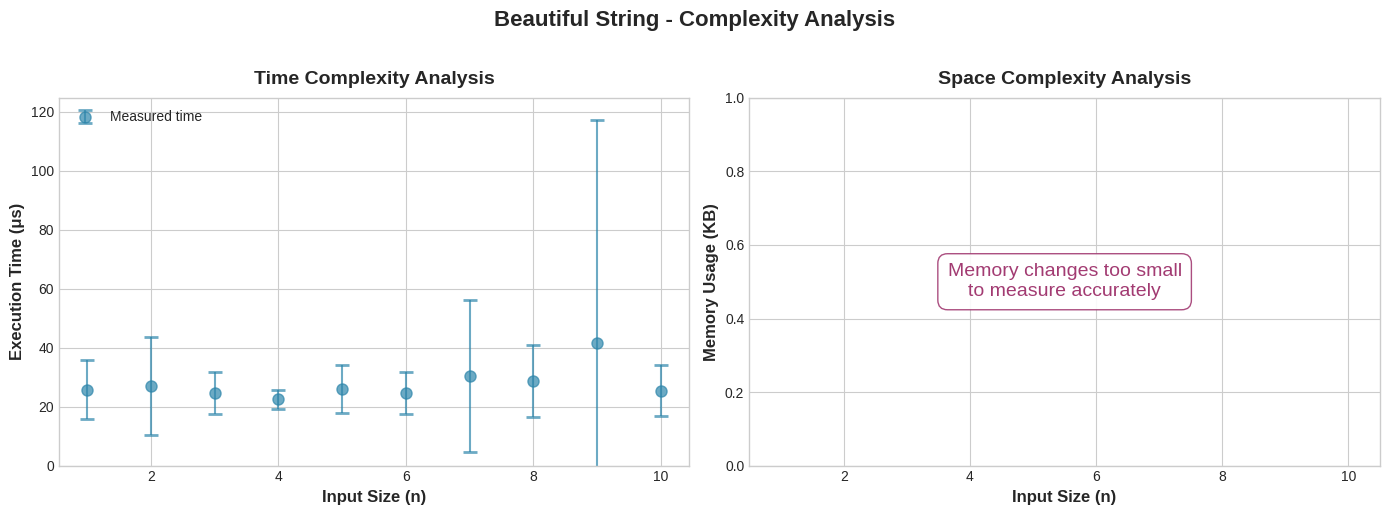

True

In [10]:
##################### VERIFY PROPOSED SOLUTION ########################

print("\nTesting proposed solution on hidden tests:")
internal_evaluation(test_file_path, proposed_solution, check_solution, parse_tests, TIME_LIMIT, MEMORY_LIMIT, get_input_size=get_input_size, plot_title='Beautiful String', show_estimation=False)

<p style="padding: 20px;
          background-color: green;
          font-family: computermodern;
          color: white;
          font-size: 200%;
          text-align: center;
          border-radius: 40px 20px;
          ">Thank you! If you found this useful, please upvote 👍</p>